In [1]:
import matplotlib.pyplot as plt
from LittleMachine_TDS_Lib import tds_sensitivity, step_average, TDS, generate_dataframe, write_file
from pandas.plotting import scatter_matrix

In [2]:
filename_before_cird = 'dec20_17.d02'
filename_after_cird = 'dec20_17.d03'
filename_sensitivity = 'dec20_17.d04'
filename_background = 'oct31_17.d01'

high_p = 3.08 * 10 ** (-9)
middle_p = 1.87 * 10 ** (-9)
low_p = 9.2 * 10 ** (-10)
percent_npts = 0.5

dwell_time = 0.2
start_temp = 87
npts = 10        # number of datapoints used to level the TDS spectrum
total_npts = 840
background_sensitivity = 1.4754 * 10 ** 14

### Initiate TDS class

In [3]:
tds_before_cird = TDS(filename_before_cird)
tds_after_cird = TDS(filename_after_cird)
background = TDS(filename_background)
sensitivity = TDS(filename_sensitivity)

### Load all the files, and plot the raw data.

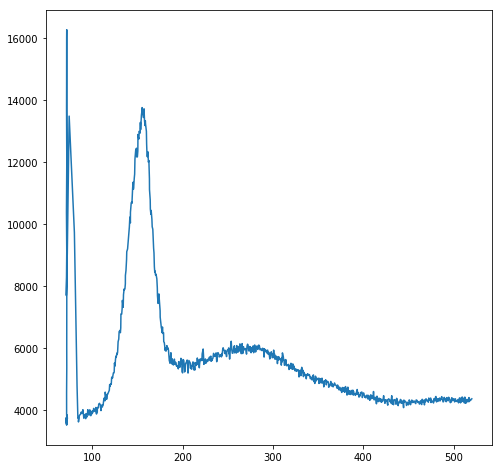

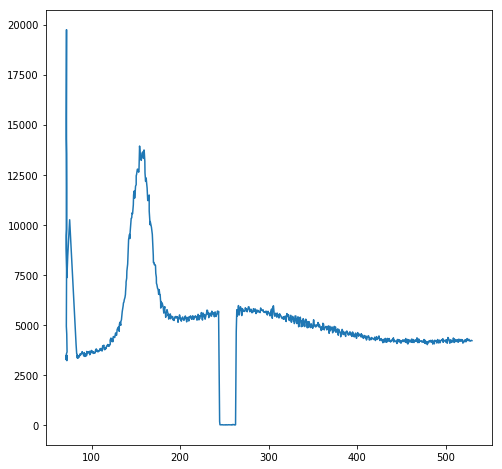

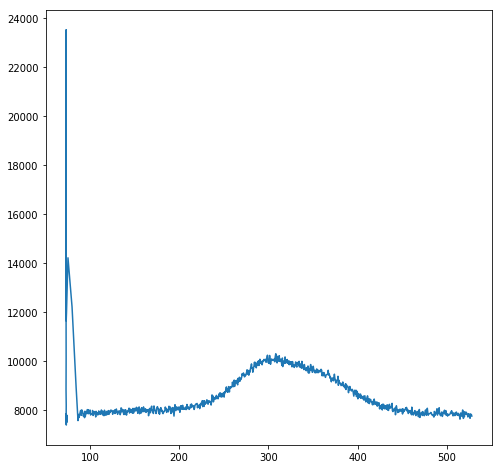

In [4]:
sensitivity.load_data(dwell_time=dwell_time, show_plot=False)
tds_before_cird.load_data(dwell_time=dwell_time, show_plot=True)
tds_after_cird.load_data(dwell_time=dwell_time, show_plot=True)
background.load_data(dwell_time=dwell_time, show_plot=True)

### Choose the startpoint, level the baseline, and plot the leveled TDS data.

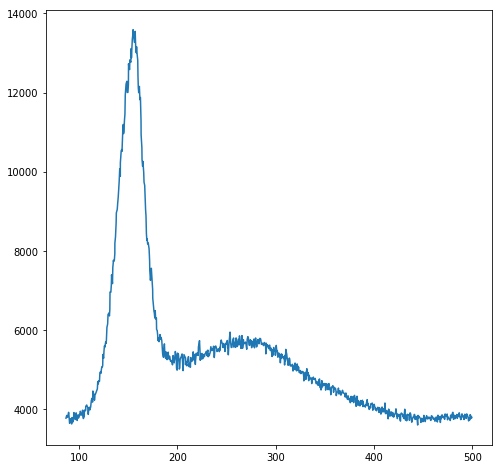

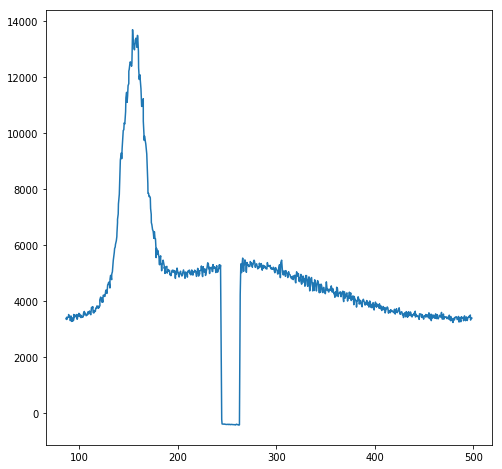

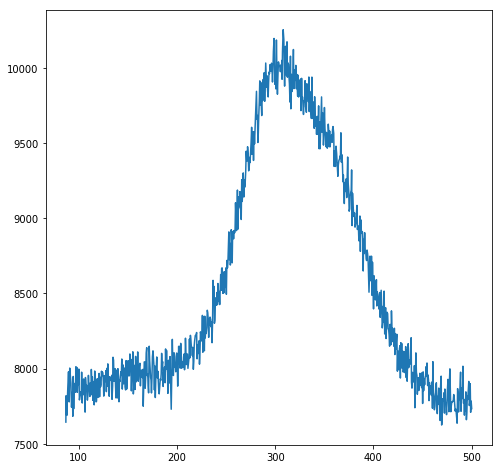

In [5]:
tds_before_cird.level_background(temp_fluc_plot=False, leveled_plot=True, dwell_time=dwell_time, npts=npts,
                                 start_temp=start_temp, total_npts=total_npts)
tds_after_cird.level_background(temp_fluc_plot=False, leveled_plot=True, dwell_time=dwell_time, npts=npts,
                                 start_temp=start_temp, total_npts=total_npts)
background.level_background(temp_fluc_plot=False, leveled_plot=True, dwell_time=dwell_time, npts=npts,
                                 start_temp=start_temp, total_npts=total_npts)

### Calculate the sensitivity factor, and the plot shows if the delimiter is correct.

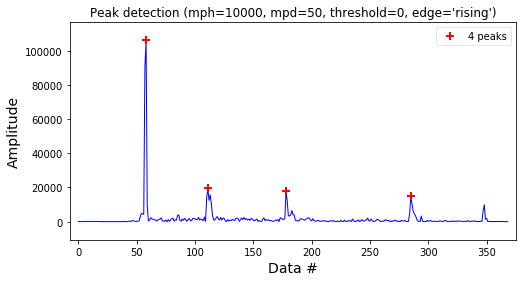

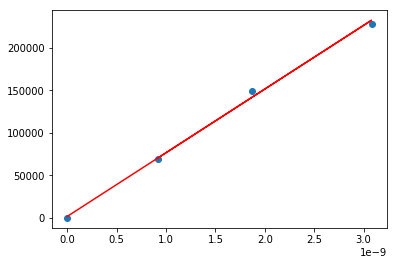

7.48298777169e+13


In [6]:
average_counts = step_average(sensitivity.data, percent_npts, show_plot=True)
current_sensitivity = tds_sensitivity(average_counts, high_p, middle_p, low_p, show_plot=True)
print(current_sensitivity)

### Shift the spectra baseline to the x-axis, and then do background subtraction. 
##### Note that the order of these two steps does not matter.

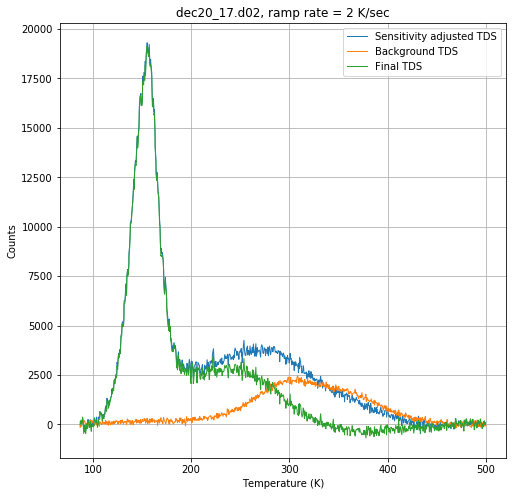

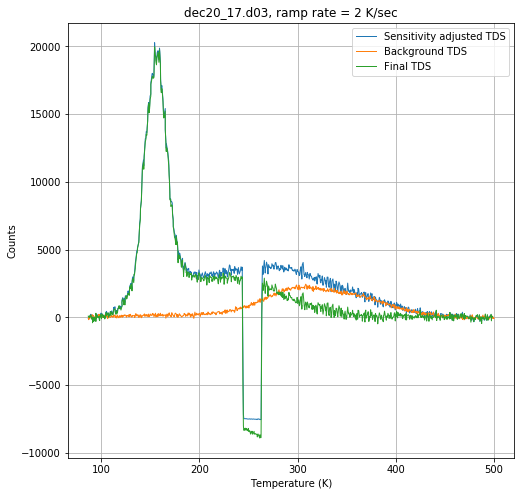

In [7]:
tds_before_cird.shift_x_axis(npts)
tds_after_cird.shift_x_axis(npts)
background.shift_x_axis(npts)
tds_before_cird.background_subtraction(background, sensitivity=current_sensitivity/background_sensitivity, show_plot=True)
tds_after_cird.background_subtraction(background, sensitivity=current_sensitivity/background_sensitivity, show_plot=True)

### Generate a dataframe that contains all the raw and processed data.
##### This dataframe can be used for generating plots, etc if needed.

In [8]:
data_processed = generate_dataframe(tds_before_cird, tds_after_cird, background)
data_processed.head()

,counts_background_subtracted_after,counts_background_subtracted_before,counts_difference,counts_leveled_after,counts_leveled_background,counts_leveled_before,counts_raw_after,counts_raw_background,counts_raw_before,counts_sensitivity_corrected_after,counts_sensitivity_corrected_before,temperature_after,temperature_average,temperature_background,temperature_before,time_elapsed
0,94.945143,127.221091,32.275948,-32.929968,-159.872251,-16.560135,3515.0,7660.0,3870.0,-64.927108,-32.651160,86.718,86.8405,86.997,86.963,0.0
1,26.022135,1.049310,-24.972825,20.854886,15.096866,8.189077,3570.0,7835.0,3895.0,41.119001,16.146176,87.466,87.3300,87.167,87.194,0.2
2,-6.476186,213.625567,220.101753,-59.044394,-109.940012,52.587620,3490.0,7710.0,3940.0,-116.416198,103.685555,87.404,87.5760,87.370,87.748,0.4
3,4.806077,28.131283,23.325206,-5.149072,-14.958360,6.681092,3545.0,7805.0,3895.0,-10.152283,13.172923,88.084,88.3335,87.471,88.583,0.6
4,153.355317,372.446868,219.091551,19.430176,-115.045377,130.549831,3570.0,7705.0,4020.0,38.309940,257.401491,88.343,88.9840,87.950,89.625,0.8


### Output the data (not all of them shown above) to a file, starting with a letter "p".
##### The tds_after_cird argument is solely for the purpose of naming and pathing. The output file starts with "p" and have the same file name as tds_after_cird.filename.

In [9]:
write_file(data_processed, tds_after_cird)

Save the data to pdec20_17.d03? (Y/N): n


### Create plot with processed data. 

In [10]:
x = "temperature_average"
y1 = "counts_background_subtracted_before"
y2 = "counts_background_subtracted_after"

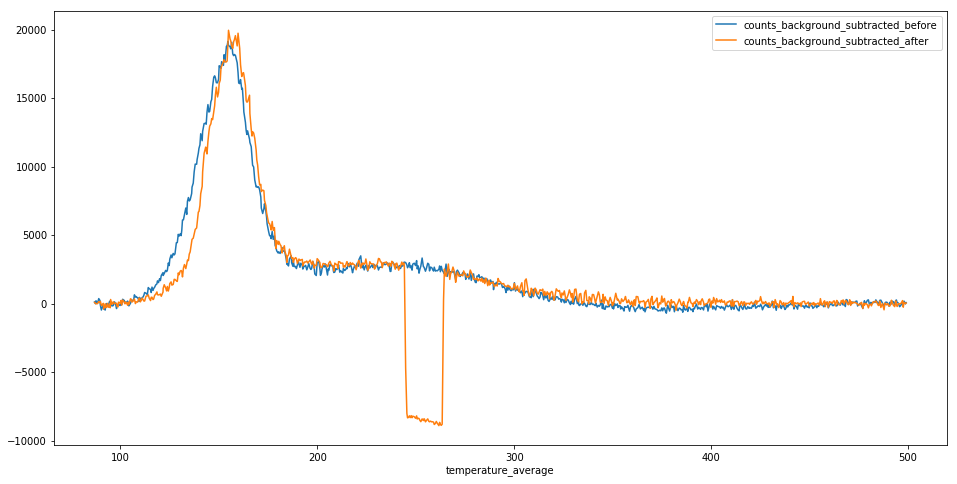

In [11]:
data_processed.set_index(x)[[y1, y2]].plot(figsize=(16,8))